## Traveling Salesperson Problem with DWAVEQUBO (LeapHybrid)
![](https://upload.wikimedia.org/wikipedia/commons/4/4f/Logo_dwave.png)

In [1]:
import numpy
print(numpy.__version__)

1.26.4


In [2]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import MDS

http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Ruprecht-Karls-Universit%C3%A4t_Heidelberg_Logo.svg/2560px-Ruprecht-Karls-Universit%C3%A4t_Heidelberg_Logo.svg.png)

### ใส่ชื่อไฟล์ที่จะทำการทดลอง

In [25]:
# open the sample file used 

file_name = 'GR17_DN-th0250.txt'
#file_name = 'FRI26_DN-th0250.txt'

### เริ่มการอ่านไฟล์ตั้งแต่บรรทัดที่ ... ถึง ... เพื่อเก็บค่า `algo_dist` (ALGORITHM_DISTANCE_MATRIX)

In [26]:
file_path = open(file_name) 
# read the content of the file opened 
content = file_path.readlines() 
def read_algo_dist_from_file(filename):
    instance=[]
    #print(filename[0])
    first_line = filename[0]
    _, _, num_samples_str = first_line.split()
    global N_samples
    N_samples, num_samples=int(num_samples_str), int(num_samples_str)
    num_points=10
    #print(num_samples_str)


    start_line = 33
    end_line = 58
    # loop through each N-Sample
    for i, line in enumerate(filename):
        if i in range(start_line-1, end_line):
            #print("line",i)
            line=filename[i].strip()
            try:
                data=list(map(float, line.split()))
            except:
                data=list(map(float, line.split(',')))

            instance.append(data)
    return instance

algo_dist=read_algo_dist_from_file(content)

In [27]:
print(algo_dist)

[[1000000.0, 1000000.0, 262.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 0.0, 154.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0], [1000000.0, 1000000.0, 110.0, 1000000.0, 61.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 154.0, 0.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0], [1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 95.0, 1000000.0, 1000000.0, 0.0, 1000000.0, 1000000.0, 1000000.0, 157.0, 1000000.0], [70.0, 1000000.0, 1000000.0, 27.0, 1000000.0, 83.0, 47.0, 68.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 0.0, 1000000.0, 1000000.0, 289.0, 55.0], [1000000.0, 1000000.0, 74.0, 1000000.0, 1000000.0, 105.0, 1000000.0, 108.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 0.0, 57.0, 1000000.0, 96.0], [1000000.0, 1000000.0, 53.0, 1000000.0, 1000000.0, 123.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 57.0, 0.0, 1000000.0, 1000000.0], [2

In [28]:
n_point=len(algo_dist)
time_step=n_point

print("points = ", n_point)

points =  8


### เก็บค่า `original_dist` (ORIGINAL_DISTANCE_MATRIX) เพื่อเขาไว้เป็น baseline ในการคำนวณ

In [29]:
def read_original_dist_from_file(file_path, n_points):
    start_line = 4
    end_line = start_line + n_points
    delimiter = ','
    with open(file_path, 'r') as file: lines = file.readlines()
    
    distance_matrix=[]
    for i, line in enumerate(lines):
        if i in range(start_line, end_line):
            try:
                row=list(map(float, line.split()))
            except:
                row=list(map(float, line.split(',')))
            distance_matrix.append(row)
    
    return np.array(distance_matrix)

original_dist = read_original_dist_from_file(file_name, len(algo_dist[0]))

### Draw problem state

In [30]:
mds=MDS(n_components=2, dissimilarity='precomputed', normalized_stress='auto', random_state=42)
coordinates=mds.fit_transform(original_dist)
coordinates-=coordinates.min(axis=0)
coordinates/=coordinates.max(axis=0)
df=pd.DataFrame(coordinates, columns=['x', 'y'])
print(len(df))
df

17


,x,y
0,0.324715,1.000000
1,0.999311,0.000000
2,0.677903,0.759884
3,0.328133,0.841428
4,0.758245,0.370882
5,0.509029,0.820547
6,0.417833,0.907862
7,0.470881,0.883004
8,0.250144,0.432305
9,1.000000,0.570179


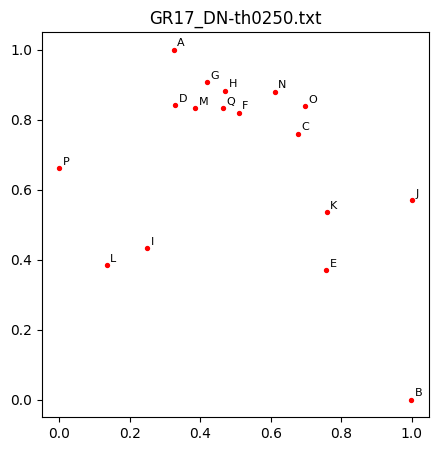

In [31]:
plt.figure(figsize=(5, 5))

city_index="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
for i in range(len(df)):
    plt.scatter(df.iloc[i]['x'], df.iloc[i]['y'], c='red', s=8)
    if n_point<=26:
        plt.text(df.iloc[i]['x']+0.01, df.iloc[i]['y']+0.01, f'{city_index[i]}', fontsize=8)
    else:
        plt.text(df.iloc[i]['x']+0.01, df.iloc[i]['y']+0.01, f'{i}')

plt.title(file_name)
plt.show()

### QUBO Building

In [32]:
class QuboPoly():
    def __init__(self, n=1024):
        self.array=np.zeros((n, n), dtype=int)
        self.constant=0
        self._size=n
    
    def add_term(self, i, j, c):
        if i>=self._size or j>=self._size:
            raise RuntimeError("Wrong index")
        self.array[i][j]+=c
        
    def add_constant(self, c):
        self.constant+=c
        
    def sum(self, p):
        if self._size != p._size:
            raise RuntimeError("Wrong polynomial size")
        self.array+=p.array
        self.constant+=p.constant
        
    def power(self):
        a=np.diag(self.array)
        self.array=np.outer(a, a) + 2*self.constant*np.diag(a) # convert back to NxN
        self.constant**=2
        
    def multiply(self, p):
        a=np.diag(self.array)
        b=np.diag(p.array)
        self.array=np.outer(a, b) + self.constant*np.diag(b) + p.constant*np.diag(a)
        self.constant*=p.constant

##### $ Obj=\sum_{t=0}^{time-1}\sum_{i=0}^{city}\sum_{j=0}^{city}x_{i,t}\cdot x_{j,t+1}\cdot d_{i,j} + \sum_{i=0}^{city}\sum_{j=0}^{city}x_{i,t_{end}}\cdot x_{j,0}\cdot d_{i,j} $ (last terms for calculating Hamiltonian cycle)

In [33]:
def objective_function():
    qubo=QuboPoly(n_point*time_step)
    # Ex. 3 cities iterate 0 1 2-> (0,1) (0,2) (2,0)
    for t in range(time_step):
        for i in range(n_point):
            for j in range(n_point):
                #print(city_index[i], city_index[j], t)
                if t==time_step-1: 
                    qubo.add_term((i*time_step)+t, (j*time_step), algo_dist[i][j])  # last terms that the final destination reaches the original node
                else:
                    qubo.add_term((i*time_step)+t, (j*time_step)+t+1, algo_dist[i][j])
    #print(qubo.array)
    return qubo

##### $ C_{1}=\sum_{t=0}^{time}(\sum_{i=0}^{city} x_{i, t}-1)^2 $ (one-hot constraint for column)

In [34]:
def build_one_car_each_t(alpha):
    qubo=QuboPoly(n_point*time_step)
    for t in range(time_step):
        tmp=QuboPoly(n_point*time_step)
        for i in range(n_point):
            #print((i*time_step)+t, t)
            tmp.add_term((i*time_step)+t, (i*time_step)+t, alpha)
        tmp.add_constant(-alpha)
        tmp.power()
        qubo.sum(tmp)
        #print(tmp.array)
    #print(qubo.array)
    return qubo

##### $ C_{2}=\sum_{i=0}^{city}(\sum_{t=0}^{time} x_{i, t}-1)^2 $ (one-hot constraint for row)

In [35]:
def build_car_visit_once(alpha):
    qubo=QuboPoly(n_point*time_step)
    for i in range(n_point):
        tmp=QuboPoly(n_point*time_step)
        for t in range(time_step):
            #print((i*time_step)+t, t)
            tmp.add_term((i*time_step)+t, (i*time_step)+t, alpha)
        tmp.add_constant(-alpha)
        tmp.power()
        qubo.sum(tmp)
        #print(tmp.array)
    #print(qubo.array)
    return qubo

#### Building $Q$ matrix

In [36]:
from time import monotonic
start_time=monotonic()  # timer

Q=QuboPoly(n_point*time_step)
Obj=objective_function()
C1=build_one_car_each_t(500) # column-alpha
C2=build_car_visit_once(500) # row-alpha
Q.sum(Obj)
Q.sum(C1)
Q.sum(C2)

print(f"Gen. Q time {monotonic() - start_time} seconds")
print("constant =", Q.constant)
#print(Q.array)
print(f"Matrix size: {Q._size} x {Q._size}")

Gen. Q time 0.004561207999358885 seconds
constant = 4000000
Matrix size: 64 x 64


In [37]:
from collections import defaultdict
Q_dwave=defaultdict(int)

for i in range(Q._size):
    for j in range(Q._size):
        if Q.array[i, j]!=0:
            Q_dwave[(i, j)]=Q.array[i, j]

print("# of terms =", len(Q_dwave))
print("# of total =", Q._size**2)
print(f'Terms = {len(Q_dwave)/(Q._size**2)}%')

# of terms = 1408
# of total = 4096
Terms = 0.34375%


### Solve $x^TQx$ via D'Wave QM

In [38]:
from dwave.system import DWaveSampler, EmbeddingComposite, LeapHybridSampler
from dimod import BinaryQuadraticModel
import time
bqm=BinaryQuadraticModel('BINARY')
bqm=BinaryQuadraticModel.from_qubo(Q_dwave)

cqm = ConstrainedQuadraticModel().from_bqm(bqm)

## **LeapHybrid Solver**

In [39]:
start_time=monotonic()
start = time.time()

bqm_sampler=LeapHybridSampler()
#sampleset=bqm_sampler.sample(bqm, label='10-TSP-QUBO1', time_limit=10)
#sampleset=bqm_sampler.sample(bqm, label='ATT48_GA-02.txt', time_limit=10)
#sampleset=bqm_sampler.sample(bqm, label='FRI26_DN-th0250.txt', time_limit=5)
sampleset=bqm_sampler.sample(bqm, label=file_name, time_limit=10)

end = time.time()
print(f"D-wave time {monotonic() - start_time} seconds")
print("The time of execution of above program is :", (end-start) * 10**3, "ms")

D-wave time 8.492450167001152 seconds
The time of execution of above program is : 8492.129802703857 ms


In [40]:
print(sampleset.info)

{'qpu_access_time': 682749, 'charge_time': 9995870, 'run_time': 9995870, 'problem_id': '795e0b6d-f138-4b08-b0f3-a4103bb0c464', 'problem_label': 'GR17_DN-th0250.txt'}


In [41]:
best_sample=sampleset.first.sample
best_energy=sampleset.first.energy

print("Best Sample:", best_sample)
print("Best Energy:", best_energy)

# map it back to answer
solution=np.zeros(n_point*time_step, dtype=int)
for index, var in enumerate(best_sample):
    solution[index]=int(best_sample[var])

Best Sample: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 1, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 0, 31: 0, 32: 0, 33: 1, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 1, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 1, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 1, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0}
Best Energy: -3499429.0


In [42]:
#import sys
#np.set_printoptions(threshold=sys.maxsize)
#print(solution.reshape(n_point, time_step))
solution=solution.reshape(n_point, time_step)
print(solution)

[[0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]]


In [43]:
def check_c1():
    for t in range(time_step):
        cnt=0
        for i in range(n_point):
            cnt+=solution[i][t]
        if cnt!=1:
            return False
    return True

def check_c2():
    for i in range(n_point):
        cnt=0
        for t in range(time_step):
            cnt+=solution[i][t]
        if cnt!=1:
            return False
    return True

In [44]:
routes=[0]*time_step
for index, (key, val) in enumerate(best_sample.items()):
    #print(index, key, val)
    if val > 0.5:
        print(f'x{index} = {val} (city: {int(index/time_step)}, time: {index%time_step})')
        routes[index%time_step]=int(index/time_step)

# append for drawing graph with Hamiltonian cycle by hand
routes.append(routes[0])
print(routes)
print("Number of visited:", len(routes))
print("Number of unique:", len(set(routes)))
print("C1:", check_c1())
print("C2:", check_c2())

x8 = 1 (city: 1, time: 0)
x22 = 1 (city: 2, time: 6)
x28 = 1 (city: 3, time: 4)
x33 = 1 (city: 4, time: 1)
x45 = 1 (city: 5, time: 5)
x51 = 1 (city: 6, time: 3)
x58 = 1 (city: 7, time: 2)
[1, 4, 7, 6, 3, 5, 2, 0, 1]
Number of visited: 9
Number of unique: 8
C1: False
C2: False


#### Visualization

In [45]:
cost = 0
for i in range(len(routes)-1):
    cost += original_dist[routes[i]][routes[i+1]]  # DON'T FORGET TO USE THE ORIGINAL_DISTANCE_MATRIX EVERYTIME YOU MAPPED BACK TO THE ANSWER
print("Total cost:", cost)

Total cost: 1764.0


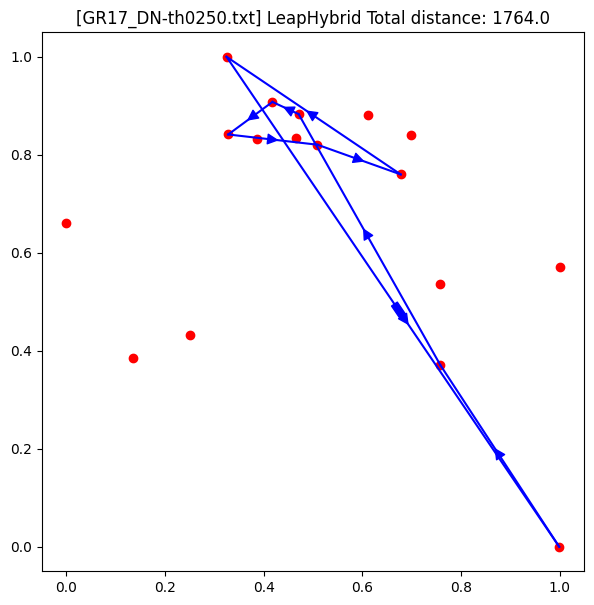

In [46]:
plt.figure(figsize=(7, 7))

for i in range(len(algo_dist[0])):
    plt.scatter(df.iloc[i]['x'], df.iloc[i]['y'], c='red')
    #plt.text(df.iloc[i]['x']+0.88, df.iloc[i]['y']+0.88, f'{i}')

for i in range(len(routes)-1):
    #plt.arrow(df.iloc[routes[i]]['x'], df.iloc[routes[i]]['y'], df.iloc[routes[i+1]]['x'] - df.iloc[routes[i]]['x'], df.iloc[routes[i+1]]['y'] - df.iloc[routes[i]]['y'], head_width=2, head_length=3, fc='blue', ec='blue')
    x1, y1=df.iloc[routes[i]]['x'], df.iloc[routes[i]]['y']
    x2, y2=df.iloc[routes[i+1]]['x'], df.iloc[routes[i+1]]['y']
    plt.plot([x1, x2], [y1, y2], c='blue')

    mid_x=(x1+x2)/2
    mid_y=(y1+y2)/2
    dx=(x2-x1)*0.05  # Offset along x-direction
    dy=(y2-y1)*0.05  # Offset along y-direction
    
    #plt.annotate('', xy=(mid_x + dx, mid_y + dy), xytext=(mid_x, mid_y), arrowprops=dict(arrowstyle='->', color='blue'))
    plt.annotate('', xy=(mid_x + dx, mid_y + dy), xytext=(mid_x, mid_y),
                 arrowprops=dict(arrowstyle='simple, tail_width=0.5, head_width=0.69, head_length=0.69', color='blue'))
        
    try: 
        plt.title(f"[{file_name}] LeapHybrid Total distance: {cost}")
    except:
        plt.title(f"LeapHybrid Total distance: {cost}")
plt.show()